# Currency Hedging
Assume that an EUR based investor is investing in EUR and US equities and EUR and
USD denominated zero coupon bonds. The investor has a one year investment horizon.
The investor’s objective is to find the optimal portfolio when allowing hedging of the USD
exposure. The hedging will be performed using one year FX forward contracts that allows
the investor to buy or sell one USD at a pre-specified price in one year.

The market is assumed to be driven by a set of market invariants:

\
\begin{align*}
\Delta X_t = \left(\begin{array}{c}
\Delta \log FX_t^{US,local} \\
\Delta \log V_t^{US} \\
\Delta \log V_t^{EUR} \\
\Delta \log V_t^{EUR,1/12} \\
\Delta y_t^{EUR,1} \\
\Delta y_t^{EUR,3} \\
\Delta y_t^{EUR,5} \\
\Delta y_t^{EUR,7} \\
\Delta y_t^{EUR,10} \\
\Delta y_t^{USD,1/12} \\
\Delta y_t^{USD,1} \\
\Delta y_t^{USD,3} \\
\Delta y_t^{USD,5} \\
\Delta y_t^{USD,7} \\
\Delta y_t^{USD,10}
\end{array}\right)
\end{align*}

The time step is assumed to be one week or 1/52 years. $FX_t$ denotes the EUR/USD exchange rate, the number of USD required to buy one EUR, $\log V_t^{US,local}$ denotes the value of US equities measured in USD, $\log V_t^{EUR}$ denotes the value of EUR equities measured in EUR, $y_t^{x,\tau}$ is the $\tau$ year continuously compounded zero coupon yield for the $x$ economy. The whole USD and EUR yield curve is spanned by these two set of zero coupon yields. The yields for any given time to maturity can be obtained by linear interpolation.

The market invariants are normally distributed

$$
\Delta X_t \sim \mathcal{N}(\mu, \Sigma)
$$

The covariance matrix is provided in the file `covariance_matrix.xlsx`. The vector of expectations is given by $\mu = (0, 0.07 \cdot \Delta t, 0.06 \cdot \Delta t, 0^T,0^T)^T$.







In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Data.Data import data_cov,data_init

## Question 1
Assume that we are standing at time $t = 0$ with initial values, $x_0$, as specified in `init_values.xlsx`. What is the distribution of $X_1$? Simulate the evolution of $X_t$ with weekly time steps from time zero to the horizon. Visualize the evolution of $\log F{X_t}$.


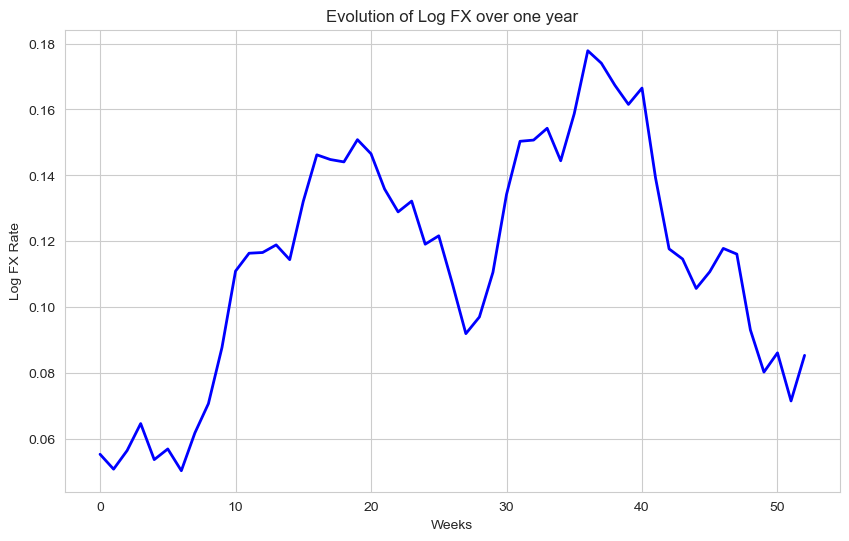

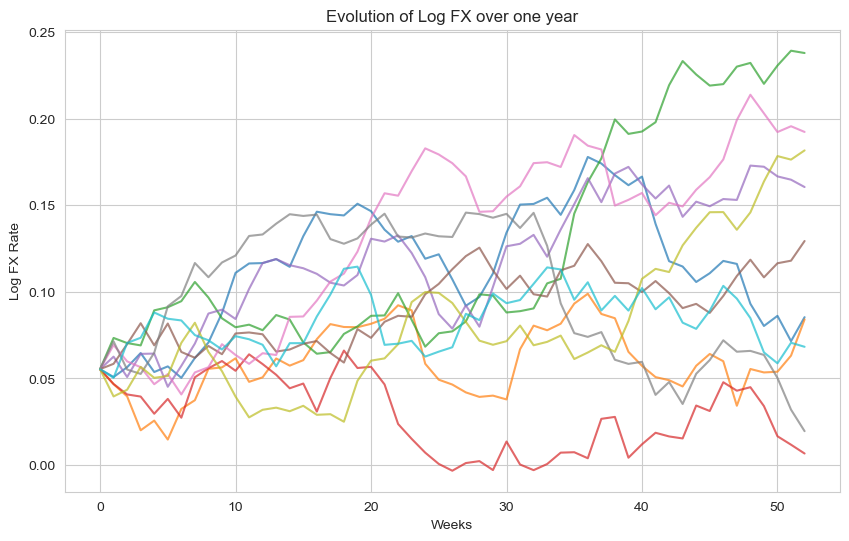

In [5]:
# Load data from the provided files
covariance_matrix = data_cov
init_values = data_init

# Simulation parameters
time_horizon = 52  # Weekly steps (1 year)
delta_t = 1 / 52   # Time step (1 week)
mean_vector = np.array([0.07 * delta_t, 0.06 * delta_t] + [0] * (len(covariance_matrix) - 2))  # μ
cov_matrix = covariance_matrix.to_numpy()  # Σ
num_simulations = 10000  # Number of paths

# Initial values
x0 = init_values["initial values"].to_numpy()

# Simulating X_t evolution
np.random.seed(42)  # For reproducibility
simulations = np.zeros((time_horizon + 1, len(x0), num_simulations))
simulations[0] = x0[:, None]  # Set initial values

for t in range(1, time_horizon + 1):
    # Generate random shocks
    shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations).T
    # Update simulations for time t
    simulations[t] = simulations[t - 1] + shocks

# Extract log FX evolution
log_fx_simulations = simulations[:, 0, :]  # log(FX_t) is the first variable



# Define the time points (from 0 to 52 weeks)
time_points = range(time_horizon + 1)

# Plot the first simulation path
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(time_points, log_fx_simulations[:, 0], label='Simulation 1', linewidth=2, color='blue')
# Adding labels and title
plt.title('Evolution of Log FX over one year')
plt.xlabel('Weeks')
plt.ylabel('Log FX Rate')
# Show the plot
plt.show()

# Visualize the evolution of log(FX_t)
plt.figure(figsize=(10, 6))
for i in range(min(10, num_simulations)):  # Plot first 10 paths
    plt.plot(range(time_horizon + 1), log_fx_simulations[:, i], alpha=0.7)
plt.title("Evolution of Log FX over one year")
plt.xlabel("Weeks")
plt.ylabel("Log FX Rate")
plt.grid(True)
plt.show()

## Question 2
Obtain the distribution of $V_{1}^{US,local}$. Again, simulate the evolution of $V_{1}^{US,local}$. Compare the simulated data with the true analytical distribution.


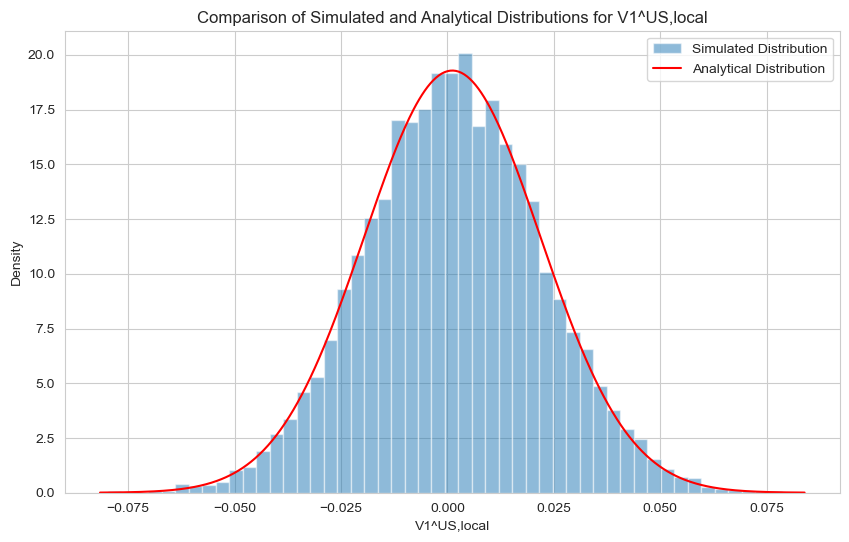

In [4]:
# Parameters and simulation setup
v_us_index = 1  # Assuming V1^US,local is the second variable in the covariance matrix
time_horizon = 1  # One time step (week)
num_simulations = 10000  # Number of simulations
mean_vector = np.array([0.07 * delta_t, 0.06 * delta_t] + [0] * (len(covariance_matrix) - 2))  # μ
cov_matrix = covariance_matrix.to_numpy()  # Covariance matrix
x0 = init_values["initial values"].to_numpy()  # Initial values

# Simulate the distribution of V1^US,local
np.random.seed(42)  # For reproducibility
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)
simulated_v1_us_local = x0[v_us_index] + simulated_shocks[:, v_us_index]

# Analytical distribution of V1^US,local
mean_v1_us_local = x0[v_us_index] + mean_vector[v_us_index]
std_v1_us_local = np.sqrt(cov_matrix[v_us_index, v_us_index])

# Plot the simulated and analytical distributions
plt.figure(figsize=(10, 6))

# Simulated distribution
plt.hist(simulated_v1_us_local, bins=50, alpha=0.5, label="Simulated Distribution", density=True)

# Analytical normal distribution
x = np.linspace(mean_v1_us_local - 4 * std_v1_us_local, mean_v1_us_local + 4 * std_v1_us_local, 500)
pdf = (1 / (std_v1_us_local * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_v1_us_local) / std_v1_us_local) ** 2)
plt.plot(x, pdf, label="Analytical Distribution", color='red')

# Labels and legend
plt.title("Comparison of Simulated and Analytical Distributions for V1^US,local")
plt.xlabel("V1^US,local")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

## Question 3
Explain how to calculate the value of a EUR or USD zero coupon bond based on the vector of yields at a given point in time. What is the distribution of an initial 5 year zero coupon at the horizon? Simulate the evolution of the initial 5 year zero coupon bond. Compare the simulated data with the true analytical distribution.


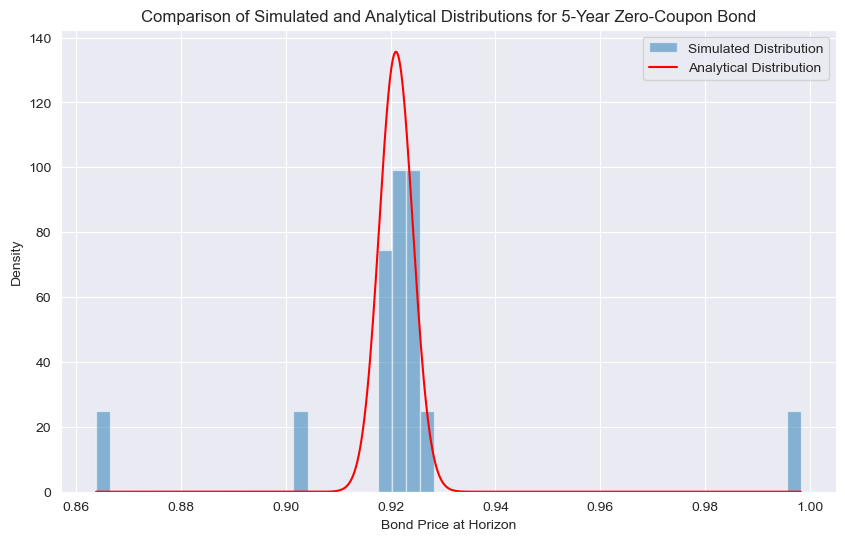

In [9]:
# Parameters
time_to_maturity = 5  # Initial maturity (years)
reduced_maturity = time_to_maturity - 1  # Maturity at horizon (4 years)
bond_index = 7  # Assuming the 5-year EUR yield is the 6th variable in the covariance matrix
num_simulations = 1000  # Number of simulations

# Initial 5-year yield
initial_yield = x0[bond_index]  # Extract initial yield from x0

# Initial bond price
initial_bond_price = np.exp(-initial_yield * time_to_maturity)

# Simulate yields at horizon
np.random.seed(42)  # For reproducibility
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)
simulated_yield_horizon = x0[bond_index] + simulated_shocks[bond_index, :]

# Simulated bond prices at horizon
simulated_bond_prices = np.exp(-simulated_yield_horizon * reduced_maturity)

# Analytical distribution of bond prices
mean_yield_horizon = x0[bond_index] + mean_vector[bond_index]
std_yield_horizon = np.sqrt(cov_matrix[bond_index, bond_index])
mean_log_price = -mean_yield_horizon * reduced_maturity
std_log_price = reduced_maturity * std_yield_horizon
mean_price = np.exp(mean_log_price + 0.5 * std_log_price**2)
std_price = np.sqrt((np.exp(std_log_price**2) - 1) * np.exp(2 * mean_log_price + std_log_price**2))

# Plot the simulated and analytical distributions
plt.figure(figsize=(10, 6))

# Simulated distribution
plt.hist(simulated_bond_prices, bins=50, alpha=0.5, label="Simulated Distribution", density=True)

# Analytical log-normal distribution
x = np.linspace(min(simulated_bond_prices), max(simulated_bond_prices), 500)
lognorm_pdf = (1 / (x * std_price * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x) - mean_log_price) / std_log_price) ** 2)
plt.plot(x, lognorm_pdf, label="Analytical Distribution", color='red')

# Labels and legend
plt.title("Comparison of Simulated and Analytical Distributions for 5-Year Zero-Coupon Bond")
plt.xlabel("Bond Price at Horizon")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## Question 4
What is the joint distribution of the vector $P_1 = (F{X_1}, V_{1}^{US,local}, V_{1}^{EUR}, Z_{1}^{USD 4Y,local}, Z_{1}^{EUR 4Y})^T$? Here $Z_{1}^{USD 4Y,local}$ denotes a 4 year USD zero coupon bond such the investor initially has bought a 5 year zero coupon bond.


In [5]:
import numpy as np
import pandas as pd

# Parameters
num_simulations = 1000  # Number of simulations
time_horizon = 1  # Horizon for joint distribution (1 year)
fx_index = 0  # Index for FX in the covariance matrix
v_us_index = 1  # Index for V^US,local
v_eur_index = 2  # Index for V^EUR
y_us_4y_index = 6  # Index for 4-year USD yield
y_eur_4y_index = 11  # Index for 4-year EUR yield

# Initial values
initial_values = x0  # Already loaded
tau = 4  # Time to maturity for 4-year bonds

# Simulate the joint distribution
np.random.seed(42)  # For reproducibility
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)

# Compute the components of P_1
simulated_fx = initial_values[fx_index] + simulated_shocks[:, fx_index]
simulated_v_us = initial_values[v_us_index] + simulated_shocks[:, v_us_index]
simulated_v_eur = initial_values[v_eur_index] + simulated_shocks[:, v_eur_index]
simulated_y_us_4y = initial_values[y_us_4y_index] + simulated_shocks[:, y_us_4y_index]
simulated_y_eur_4y = initial_values[y_eur_4y_index] + simulated_shocks[:, y_eur_4y_index]

# Calculate bond prices
simulated_z_us_4y = np.exp(-simulated_y_us_4y * tau)
simulated_z_eur_4y = np.exp(-simulated_y_eur_4y * tau)

# Combine into joint distribution P_1
joint_distribution = np.vstack((simulated_fx, simulated_v_us, simulated_v_eur, simulated_z_us_4y, simulated_z_eur_4y)).T

# Convert to DataFrame for easier analysis
columns = ["FX_1", "V_US_1_local", "V_EUR_1", "Z_US_4Y_local", "Z_EUR_4Y"]
joint_distribution_df = pd.DataFrame(joint_distribution, columns=columns)

# Display summary statistics
print(joint_distribution_df.describe())


              FX_1  V_US_1_local      V_EUR_1  Z_US_4Y_local     Z_EUR_4Y
count  1000.000000   1000.000000  1000.000000    1000.000000  1000.000000
mean      0.056596      0.001464     0.000442       0.922979     0.858288
std       0.010803      0.021526     0.022045       0.003071     0.003556
min       0.021322     -0.078302    -0.074756       0.913935     0.848017
25%       0.049647     -0.013878    -0.015612       0.920763     0.855911
50%       0.056655      0.002150     0.000820       0.922966     0.858191
75%       0.063455      0.015427     0.015415       0.925031     0.860731
max       0.091400      0.072690     0.066410       0.932422     0.869543


## Question 5
What is the distribution of the vector $P_{1}^{EUR} = (\frac{1}{F{X_1}}, V_{1}^{US}, V_{1}^{EUR}, Z_{1}^{USD 4Y}, Z_{1}^{EUR 4Y})^T$ where all values are in EUR? Compare the simulated data with the true analytical distribution for $V_{1}^{US}$.


            1/FX_1  V_1^US (EUR)      V_1^EUR  Z_1^USD 4Y (EUR)   Z_1^EUR 4Y
count  1000.000000   1000.000000  1000.000000       1000.000000  1000.000000
mean      0.945031      0.001341     0.000442          0.872242     0.858288
std       0.010215      0.020343     0.022045          0.009739     0.003556
min       0.912652     -0.076416    -0.074756          0.844767     0.848017
25%       0.938517     -0.013212    -0.015612          0.866174     0.855911
50%       0.944920      0.002023     0.000820          0.872202     0.858191
75%       0.951565      0.014594     0.015415          0.878684     0.860731
max       0.978903      0.068491     0.066410          0.907355     0.869543


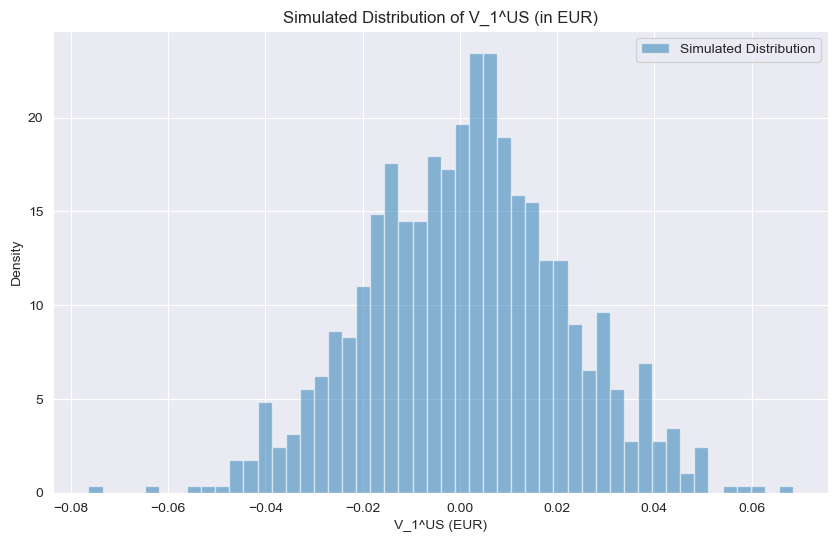

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
num_simulations = 1000  # Number of simulations
tau = 4  # Time to maturity for 4-year bonds
fx_index = 0  # Index for FX in the covariance matrix
v_us_index = 1  # Index for V^US
v_eur_index = 2  # Index for V^EUR
y_us_4y_index = 6  # Index for 4-year USD yield
y_eur_4y_index = 11  # Index for 4-year EUR yield

# Simulate market invariants
np.random.seed(42)  # For reproducibility
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)

# Simulated components
simulated_fx = initial_values[fx_index] + simulated_shocks[:, fx_index]
simulated_v_us = initial_values[v_us_index] + simulated_shocks[:, v_us_index]
simulated_v_eur = initial_values[v_eur_index] + simulated_shocks[:, v_eur_index]
simulated_y_us_4y = initial_values[y_us_4y_index] + simulated_shocks[:, y_us_4y_index]
simulated_y_eur_4y = initial_values[y_eur_4y_index] + simulated_shocks[:, y_eur_4y_index]

# Convert yields to bond prices
simulated_z_us_4y = np.exp(-simulated_y_us_4y * tau)
simulated_z_eur_4y = np.exp(-simulated_y_eur_4y * tau)

# Convert USD values to EUR
simulated_fx_inverse = 1 / np.exp(simulated_fx)  # 1 / FX_1
simulated_v_us_eur = simulated_v_us * simulated_fx_inverse  # V_1^US / FX_1
simulated_z_us_4y_eur = simulated_z_us_4y * simulated_fx_inverse  # Z_1^USD / FX_1

# Combine into joint distribution P_1^EUR
joint_distribution_eur = np.vstack((
    simulated_fx_inverse,
    simulated_v_us_eur,
    simulated_v_eur,
    simulated_z_us_4y_eur,
    simulated_z_eur_4y
)).T

# Convert to DataFrame for easier analysis
columns = ["1/FX_1", "V_1^US (EUR)", "V_1^EUR", "Z_1^USD 4Y (EUR)", "Z_1^EUR 4Y"]
joint_distribution_eur_df = pd.DataFrame(joint_distribution_eur, columns=columns)

# Summary statistics
print(joint_distribution_eur_df.describe())

# Visualize one component (e.g., V_1^US (EUR))
plt.figure(figsize=(10, 6))
plt.hist(joint_distribution_eur_df["V_1^US (EUR)"], bins=50, alpha=0.5, label="Simulated Distribution", density=True)
plt.title("Simulated Distribution of V_1^US (in EUR)")
plt.xlabel("V_1^US (EUR)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


The one year FX forward price is given by

$$
F_0^1 = F{X_0} e^{1\cdot(y_{0}^{USD,1} - y_{0}^{EUR,1})}
$$

which is the exchange rate (the price of one EUR in USD) that the investor can lock in at time zero.

The investor can choose a 5 x 1 holding vector **$h$** which defines the number of units in each asset / instrument. The first instrument is a FX forward that gives the investor the right and obligation to sell 1 unit of USD for the price $1/F_0^1$ in one year while the remaining assets are the ones discussed above. Note that the forward contract has a value of zero initially. The portfolio PnL of the investor is given by the product of the holding vector and the vector of PnLs

$$
PnL_1 = h^T PnL_1
$$

where

$$
PnL_1 = \begin{pmatrix}
\frac{1}{F_0^1} - \frac{1}{F_{X_1}} \\
V_{1}^{US} - V_{0}^{US} \\
V_{1}^{EUR} - V_{0}^{EUR} \\
Z_{1}^{USD 4Y} - Z_{0}^{USD 5Y} \\
Z_{1}^{EUR 4Y} - Z_{0}^{EUR 5Y}
\end{pmatrix}
$$


## Question 6
How could we calculate the expectation and the covariance matrix of the PnL vector? What is the distribution of the PnL vector? Can we derive the distribution of the PnL of the portfolio? What is the expectation and variance of the portfolio PnL?




In [8]:
import numpy as np

# Parameters
num_simulations = 1000  # Number of simulations
tau_us = 4  # Time to maturity for USD bond
tau_us_initial = 5  # Initial maturity for USD bond
tau_eur = 4  # Time to maturity for EUR bond
tau_eur_initial = 5  # Initial maturity for EUR bond
fx_index = 0  # Index for FX in the covariance matrix
v_us_index = 1  # Index for V^US
v_eur_index = 2  # Index for V^EUR
y_us_1_index = 6  # Index for 1-year USD yield
y_eur_1_index = 11  # Index for 1-year EUR yield

# Simulate market invariants
np.random.seed(42)
simulated_shocks = np.random.multivariate_normal(mean_vector, cov_matrix, num_simulations)

# Simulated components
simulated_fx = initial_values[fx_index] + simulated_shocks[:, fx_index]
simulated_v_us = initial_values[v_us_index] + simulated_shocks[:, v_us_index]
simulated_v_eur = initial_values[v_eur_index] + simulated_shocks[:, v_eur_index]
simulated_y_us_1 = initial_values[y_us_1_index] + simulated_shocks[:, y_us_1_index]
simulated_y_eur_1 = initial_values[y_eur_1_index] + simulated_shocks[:, y_eur_1_index]

# Bond prices
simulated_z_us_4y = np.exp(-simulated_y_us_1 * tau_us)
simulated_z_eur_4y = np.exp(-simulated_y_eur_1 * tau_eur)
initial_z_us_5y = np.exp(-initial_values[y_us_1_index] * tau_us_initial)
initial_z_eur_5y = np.exp(-initial_values[y_eur_1_index] * tau_eur_initial)

# FX Forward Price
f0 = np.exp(simulated_fx) * np.exp(initial_values[y_us_1_index] - initial_values[y_eur_1_index])

# PnL components
pnl_fx = 1 / f0 - 1 / np.exp(simulated_fx)
pnl_v_us = simulated_v_us - initial_values[v_us_index]
pnl_v_eur = simulated_v_eur - initial_values[v_eur_index]
pnl_z_us = simulated_z_us_4y - initial_z_us_5y
pnl_z_eur = simulated_z_eur_4y - initial_z_eur_5y

# Combine into PnL vector
pnl_vector = np.vstack((pnl_fx, pnl_v_us, pnl_v_eur, pnl_z_us, pnl_z_eur)).T

# Expectation and covariance of PnL vector
pnl_mean = np.mean(pnl_vector, axis=0)
pnl_covariance = np.cov(pnl_vector, rowvar=False)

# Portfolio PnL
h = np.array([0.2, 0.3, 0.3, 0.1, 0.1])  # Example holding vector
portfolio_pnl = pnl_vector @ h

# Expectation and variance of portfolio PnL
portfolio_pnl_mean = np.mean(portfolio_pnl)
portfolio_pnl_variance = np.var(portfolio_pnl)

# Summary
print("PnL Vector Mean:\n", pnl_mean)
print("PnL Vector Covariance:\n", pnl_covariance)
print("Portfolio PnL Mean:", portfolio_pnl_mean)
print("Portfolio PnL Variance:", portfolio_pnl_variance)


PnL Vector Mean:
 [0.01731776 0.00146369 0.00044173 0.01835567 0.03218226]
PnL Vector Covariance:
 [[ 3.50370398e-08 -7.78360087e-07  9.84836874e-08 -2.52556742e-08
  -1.93801164e-07]
 [-7.78360087e-07  4.63371063e-04  3.66659955e-04  7.53339809e-06
  -1.16743398e-05]
 [ 9.84836874e-08  3.66659955e-04  4.85968148e-04  3.31847963e-06
  -1.49809261e-05]
 [-2.52556742e-08  7.53339809e-06  3.31847963e-06  9.43028322e-06
   7.37680929e-06]
 [-1.93801164e-07 -1.16743398e-05 -1.49809261e-05  7.37680929e-06
   1.26422712e-05]]
Portfolio PnL Mean: 0.00908897255158783
Portfolio PnL Variance: 0.0001506196628647507


The optimal number of FX forward contracts, $h_1$, to minimize the PnL variance for a fixed allocation to the remaining assets $h_2$ ($h = (h_1, h_2^T)^T$) is given by

$$
h_1 = \frac{-\Sigma^{PnL}_{12} h_2}{\Sigma^{PnL}_{11}}
$$

where

$$
\Sigma_{PnL} = \begin{pmatrix}
\Sigma^{PnL}_{11} & \Sigma^{PnL}_{12} \\
\Sigma^{PnL}_{21} & \Sigma^{PnL}_{22}
\end{pmatrix}
$$


## Question 7
Define the hedge ratio as the amount USD hedged (the number of forward contracts) relative to the amount of USD invested. Consider three different portfolios: One that invests 1 EUR in 5 year USD zero coupon bond and one that invests 0.2 EUR in both US and EUR equities and 0.3 EUR in both EUR and USD zero coupon bonds. For the three portfolios plot the combinations of standard deviation and expected PnL for hedge ratios ranging from -1 to 1.5. Calculate the optimal hedge ratios for each portfolio and add their standard deviation and expected PnL to the plots. What do you observe?


## Question 8
For the multi-asset portfolio, describe how to find the minimum 5% CVaR hedge ratio. Plot the combinations of 5% CVaR and expected PnL for hedge ratios ranging from -1 to 1.5. What do you observe?


## Question 9
For the multi-asset portfolio, describe how to perform a simulation study that examines the effect of estimation uncertainty from estimating $\Sigma$ using the sample covariance matrix while keeping $\mu$ fixed. Consider a two year sample of the market invariants. Based on simulated covariance matrices, calculate optimal hedge ratios. Evaluate the simulated optimal hedge ratios using the true distributional parameters to visualize the resulting distributions of expected PnL, standard deviation, 5% CVaR, etc.


## Question 10
The investor is considering different portfolio optimization strategies for setting both the optimal asset weights and the optimal hedge ratio. The three possibilities are:

- Mean-Variance portfolio optimization using pre-specified hedge ratios equal to the asset specific optimal (minimum-variance) hedge ratios.
- Initial Mean-Variance portfolio optimization with a hedge ratio constrained to zero followed by choosing the hedge ratio as the minimum-variance hedge ratio.
- Full scale Mean-Variance portfolio optimization that allows the hedge ratio to be calculated directly.

Implement the three portfolio optimization strategies. A non-shorting constraint is imposed for the four assets, but not the forward contract. The investor has a budget of 1 EUR. For each strategy, the efficient frontier needs to be calculated for all possible PnL targets from the smallest to the largest. Present relevant visualizations and discuss your results.


## Question 11
Perform a simulation study that examines the effect of estimation uncertainty from estimating $\Sigma$ using the sample covariance matrix while keeping $\mu$ fixed for the three strategies (consider only one or two portfolios on the efficient frontier, e.g., the minimum-variance portfolio). Present and discuss relevant results.
